### 6.30 Fuel efficiency.  
**a)**

In [83]:
mpg = c(41.5, 50.7, 36.6, 37.3, 34.2, 45.0, 48.0, 43.2, 47.7, 42.2, 
        43.2, 44.6, 48.4, 46.4, 46.8, 39.2, 37.3, 43.5, 44.3, 43.3)

s = summary(mpg)
mean = s['Mean']
sd = sd(mpg)
cat('mean =', mean)
cat('\n')
cat('standard deviation =', sd)

mean = 43.17
standard deviation = 4.414939

**b)**  Based on the histogram below and the summary above, a normal distribution would be appropriate for the dataset, especially because there is no skew and the sample size is greater than 15.

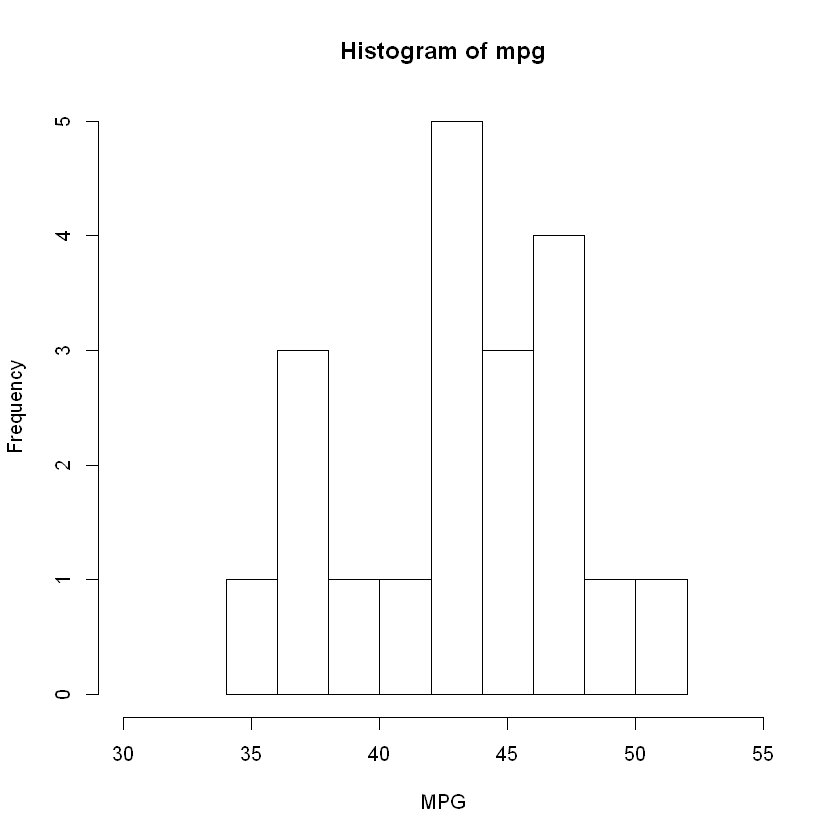

In [84]:
hist(mpg, xlab = "MPG", xlim = c(30,55))

**c)**

In [85]:
# For 95%, Z = 1.96

pop_sd = 3.5
z= 1.96

low = mean - z*(pop_sd/sqrt(length(mpg)))
high = mean + z*(pop_sd/sqrt(length(mpg)))

cat(sprintf('The confidence interval is between %s and %s', round(low, 3), round(high, 3)))

The confidence interval is between 41.636 and 44.704

### 6.31 Fuel efficiency in metric units.

In [86]:
# 1 mile / gallon * 1.609 km / 1 mile * 1 gallon / 3.785 liters = 1.609 / 3.785

ratio = 1.609 / 3.785
kpl_pop_sd = ratio * pop_sd 

kpl = c();
for (x in mpg) {
    kpl = c(kpl, round(ratio * x, 2))
}
s = summary(kpl)
mean = s['Mean']
sd = sd(kpl)
cat('mean =', mean)
cat('\n')
cat('standard deviation =', sd)

# Margin of Error : z * pop_sd / sqrt(n)

moe = z*(kpl_pop_sd/sqrt(length(kpl)))
cat('\n')
cat('Margin of Error =', round(moe, 3))


mean = 18.3505
standard deviation = 1.875146
Margin of Error = 0.652

### 7.30 Fuel efficiency t test.  
**a)**  Since there are no outliers and no apparent skewness and the linear distribution in tht Q-Q plot, it is appropriate to analyze these data using methods based on Normal distributions

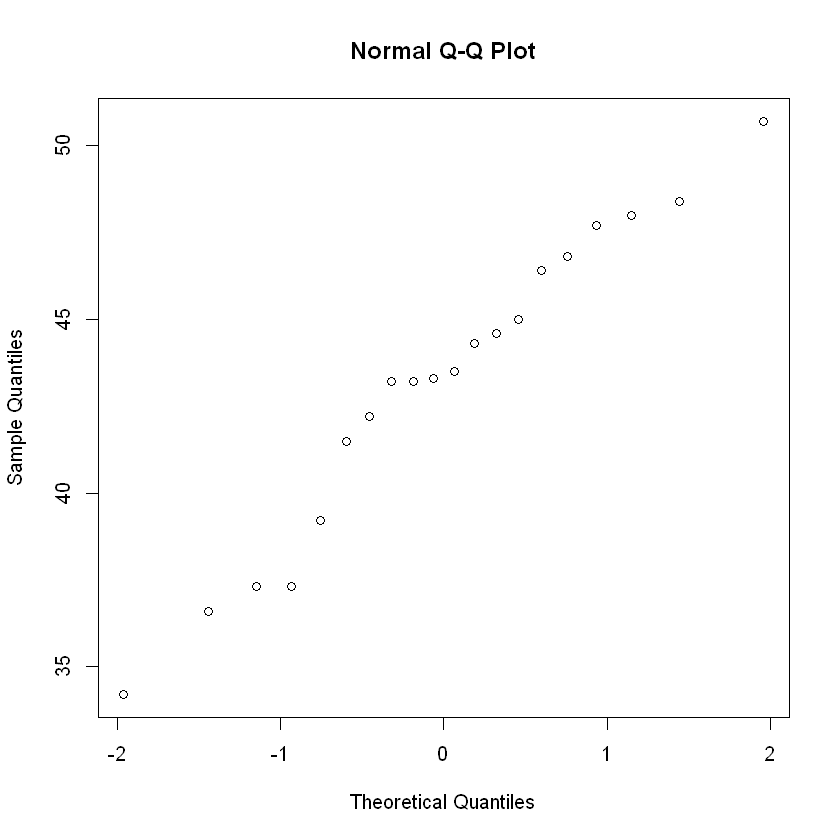

In [89]:
qqnorm(mpg)

**b)**

In [132]:
s = summary(mpg)
mean = s['Mean']
sd = sd(mpg)
cat('mean =', mean)
cat('\n')
cat('standard deviation =', round(sd, 3))

# Standard error = sd / sqrt(n)
se = sd/sqrt(length(mpg))
cat('\n')
cat('standard error =', round(se, 3))

# 95% Margin of error = t(alpha/2) × Standard error for population mean
df = length(mpg) - 1
t = abs(qt(0.05/2, df))
cat('\n')
cat('margin of error =', round(t * se, 3))

mean = 43.17
standard deviation = 4.415
standard error = 0.987
margin of error = 2.066

**c)**

In [117]:
# CI = xbar +- t(alpha/2) × Standard error for population mean
low = mean - (t * se)
high = mean + (t * se)
cat(sprintf('The confidence interval is between %s and %s', round(low, 3), round(high, 3)))

The confidence interval is between 41.104 and 45.236

### 7.39 Fuel efficiency comparison t test.  
**a)**  
* H0: There **isn't** a significant difference between the means of two calculations.  
* Ha: There **is** a significant difference between the means of two calculations.  

**b)**  Based on the p-value being less than the significance level (0.05), we can reject the null hypothesis (h0)

In [154]:
comp = c(41.5, 50.7, 36.6, 37.3, 34.2, 45.0, 48.0, 43.2, 47.7, 42.2,
        43.2, 44.6, 48.4, 46.4, 46.8, 39.2, 37.3, 43.5, 44.3, 43.3)
driver = c(36.5, 44.2, 37.2, 35.6, 30.5, 40.5, 40.0, 41.0, 42.8, 39.2,
          38.8, 44.5, 45.4, 45.3, 45.7, 34.2, 35.2, 39.8, 44.9, 47.5)

diff = c();
for (i in 1:length(comp)) {
    diff = c(diff, round((comp[i] - driver[i]), 2))
}

test = t.test(diff)
cat('t-stat:', round(test$statistic, 3))
cat('\n')
cat('p-value:', round(test$p.value, 5))

t-stat: 4.358
p-value: 0.00034

### 6.37 More than one confidence interval.  
**a)**

In [171]:
n = 5 # intervals
prob = 0.95
size = 5 # successes

bp5 = dbinom(n, size, prob)

cat('p(X=5)=', round(bp5, 5)) # success of all five intervals

p(X=5)= 0.77378

**b)**

In [175]:
bp4 = dbinom(4, 5, prob) # success of 4 intervals

cat('\n')
cat('p(X>=4) = p(X=4) + p(X=5) =', round(bp4 + bp5, 5))


p(X>=4) = p(X=4) + p(X=5) = 0.97741

### 6.52 What’s wrong?  
**a)**  Testing for the sample mean does not make sense because the assumption is that we already know the sample mean. Instead we should be testing for the population using the sample mean.  
**b)** The standard error for a sample is standard / sqrt(n). The calculation is missing the square root around the sample size.  
**c)** We cannot have statistical evidence for the population mean being greater than 50 because the sample mean is 45 which is less than 50.  
**d)** We cannot be conclusive when determining the null hypothesis. Instead, we can reject the null hypothesis.

### 6.58 Computing the P-value.  

In [198]:
# Ha:μ > μ0

Z = 1.77
pMoreThanZ = pnorm(Z, lower.tail = FALSE)
cat(sprintf('P(X > %s) = %s', Z, round(pMoreThanZ, 4)))

# Ha:μ < μ0

pLessThanZ = pnorm(Z, lower.tail = TRUE)
cat('\n')
cat(sprintf('P(X > %s) = %s', Z, round(pLessThanZ, 4)))

# Ha:μ != μ0

pNotEqualZ = 2 * pnorm(Z, lower.tail = FALSE)
cat('\n')
cat(sprintf('P(X > |%s|) = %s', Z, round(pNotEqualZ, 4)))

P(X > 1.77) = 0.0384
P(X > 1.77) = 0.9616
P(X > |1.77|) = 0.0767

### 6.129 Blood phosphorus level in dialysis patients.  
**a)**

In [227]:
blood = c(5.4, 5.2, 4.5, 4.9, 5.7, 6.3)
n = length(blood)
mean = mean(blood)
pop_sd = 0.9
Z = 1.96 # For 95% Confidence

low = mean - Z*(pop_sd/sqrt(n))
high = mean + Z*(pop_sd/sqrt(n))

cat(sprintf('The confidence interval is between %s and %s', round(low, 3), round(high, 3)))

The confidence interval is between 4.613 and 6.053

**b)** Based on the probability calcualted below (~0.073), we can conclude that there isn't enough evidence that the eman exceeds 4.8.

In [235]:
pop_mean = 4.8
df = n - 1

cat('H0: The mean equals', pop_mean)
cat('\n')
cat('Ha: The mean is greater than', pop_mean)

# t-statistic = (xbar-mu)/(pop_sd/sqrt(n)))

t = (mean-pop_mean)/(pop_sd/sqrt(n))
p = pnorm(-abs(t))

cat('\n')
cat('P(X > 4.8) =', round(p, 5))

H0: The mean equals 4.8
Ha: The mean is greater than 4.8
P(X > 4.8) = 0.07331

### 7.17 Finding the critical value t*

In [ ]:
gt